In [1]:
%matplotlib inline
from skimage import io
import skimage as sk
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import os

In [228]:
def clean_xray(img):
    image = sk.img_as_float(img.copy())
    if type(image) is not np.ndarray:
        raise TypeError('Input must be numpy ndarray.')
    else:
        p1 = np.percentile(image, 0.0001)
#         print("mean:",image.mean(),'p1: ',p1,'max: ',image.max())
#         image[image ==image.max()] = image.mean()
#         image[image<p1] = image.mean()
        p80, p99 = np.percentile(image, (80, 99.99))
        print("mean:",image.mean(),'p80: ',p80,'p99: ',p99)
        image[image > p99] = p80
        image[image<p1] = p1
#         exposure.rescale_intensity(image)
    return sk.img_as_ubyte(image)

In [18]:
def imm(image):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image, cmap = 'gray')
    ax.axis('off')

In [5]:
def auto_adjust_TEM(image):
    image = exposure.equalize_adapthist(exposure.adjust_sigmoid(clean_xray(image)))
    return image

In [4]:
def adjust_pipeline(directory_list):
    for directory in directory_list:
        new_directory = os.mkdir(directory+'/adjustedTif')
        images = io.ImageCollection(directory+"/*.tif")
        file_list = images.files
        name_list = [name.split('/')[-1].split('.')[0] for name in file_list]
        for idx, img in enumerate(images):
            img = auto_adjust_TEM(img)
            io.imsave(new_directory+'/'+name_list[idx]+'.png')
        print('done!')

In [23]:
fname = '/Users/cgroschner/Documents/pythonDev/particleRecognition/image_processing/CdSe_tif_files.txt'
with open(fname) as f:
    content = f.readlines()
content = [x.strip('\n') for x in content] 

In [282]:
images2 = io.ImageCollection(content[2]+'/*.tif')

# lim_images2 = [images2[114].copy(),images2[90].copy(),images2[111].copy()\
#                ,images2[108].copy(),images2[105].copy(),images2[78].copy(),images2[62].copy()]

In [27]:
lim_images2[0]

array([[33, 33, 32, ..., 32, 34, 30],
       [34, 33, 32, ..., 32, 33, 31],
       [32, 33, 33, ..., 32, 31, 31],
       ..., 
       [32, 32, 32, ..., 34, 34, 33],
       [34, 32, 34, ..., 33, 34, 35],
       [33, 33, 34, ..., 34, 34, 33]], dtype=uint8)

In [274]:
directory = '/Users/cgroschner/Box Sync/Research/HR-TEM/20180209/101727H_prep20180208_plasma/8bit/*.tif'
images = io.ImageCollection(directory)

In [269]:
lim_images2 = [images2[114].copy(),images2[90].copy(),images2[111].copy()\
               ,images2[108].copy(),images2[105].copy(),images2[78].copy(),images2[62].copy(),images2[12].copy()]

mean: 0.142482732324 p80:  0.145098039216 p99:  0.16862745098


/Users/cgroschner/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


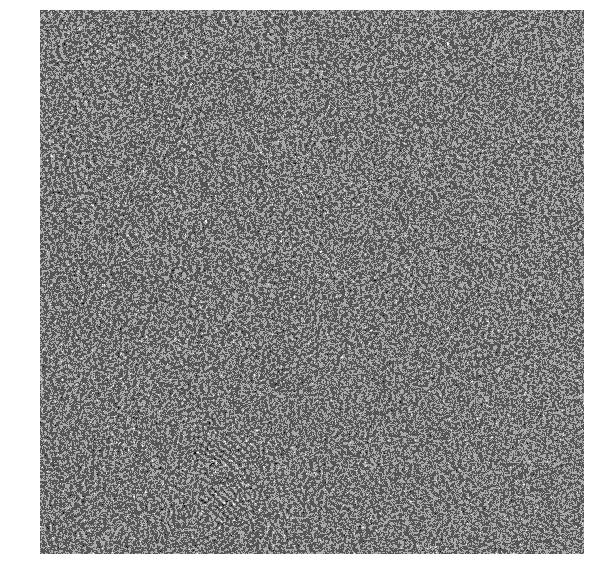

In [270]:
imm(exposure.equalize_adapthist(exposure.adjust_sigmoid(clean_xray(lim_images2[3]))))

mean: 0.142482732324 p80:  0.145098039216 p99:  0.16862745098


/Users/cgroschner/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


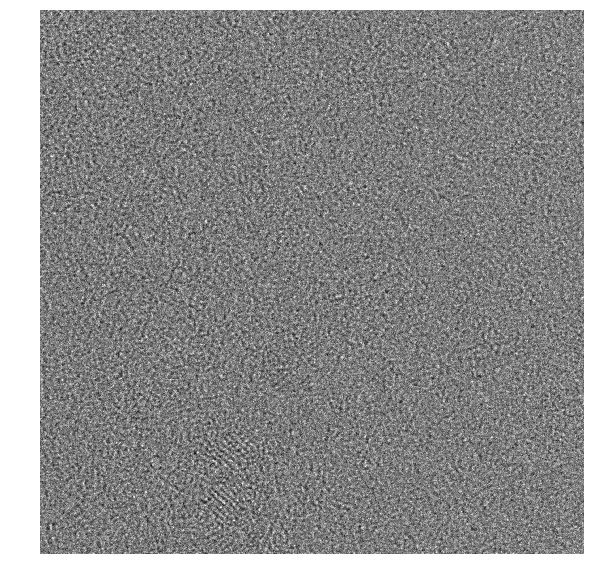

In [271]:
imm(exposure.equalize_adapthist(clean_xray(lim_images2[3])))

mean: 0.129478967891 p80:  0.133333333333 p99:  0.152941176471


/Users/cgroschner/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


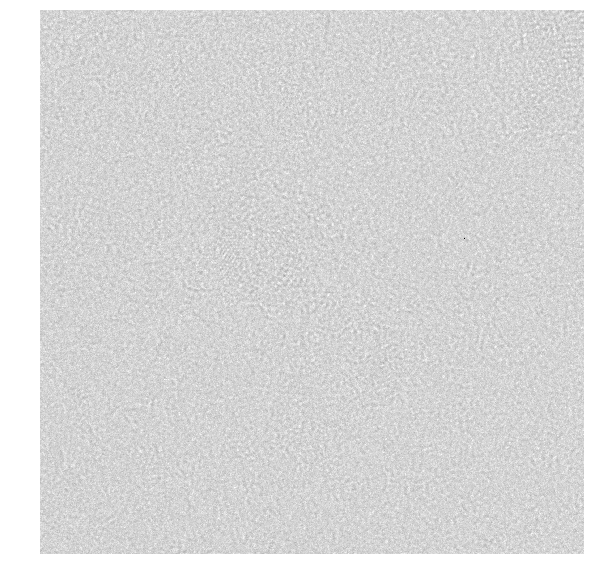

In [226]:
imm(exposure.equalize_adapthist(clean_xray(lim_images2[0])))

In [184]:
for im in lim_images2:
    print(exposure.is_low_contrast(im))

True
True
True
True
True
True
True
True


mean: 0.221025377161 p80:  0.243137254902 p99:  0.357421568627


/Users/cgroschner/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


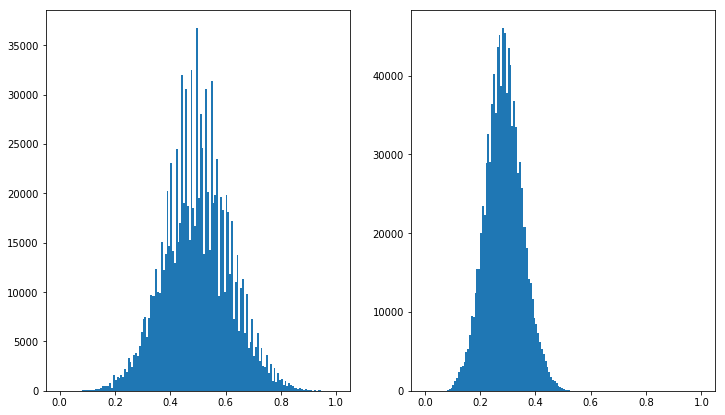

In [254]:
fig, [ax1, ax2] =plt.subplots(1,2,figsize=(12,7))
# _=ax.hist(exposure.equalize_adapthist(clean_xray(lim_images2[0])).ravel(),bins=150)
_=ax1.hist(exposure.equalize_adapthist(clean_xray(lim_images2[6])).ravel(),bins=150)
_=ax2.hist(exposure.equalize_adapthist(lim_images2[6]).ravel(),bins=150)
# ax1.set_ylim(0,1000)
# ax2.set_ylim(0,1000)

/Users/cgroschner/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


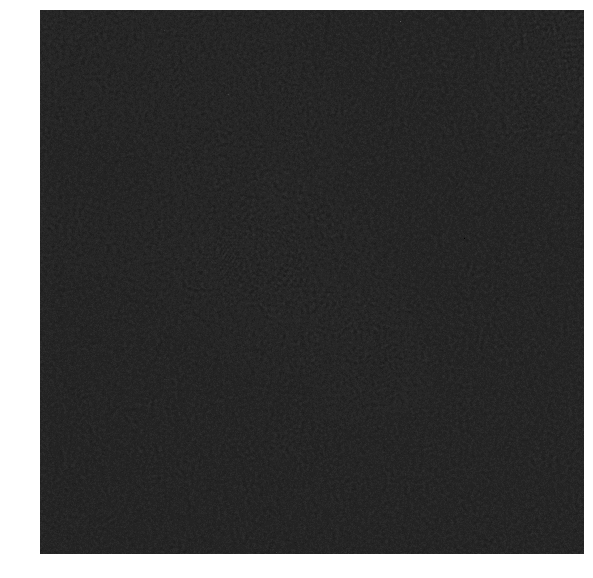

In [122]:
imm(clean_xray(exposure.equalize_adapthist(lim_images2[0])))

33.0171368122 49.0 58.0


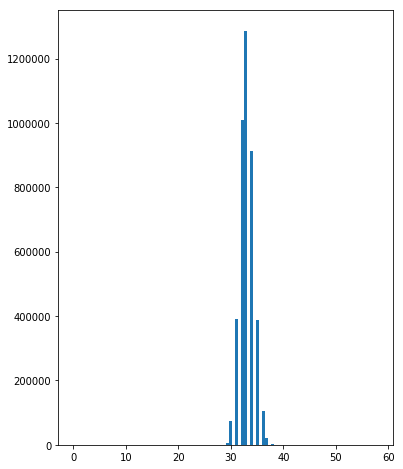

In [79]:
fig, ax =plt.subplots(figsize=(6,8))
# _=ax.hist(exposure.equalize_adapthist(clean_xray(lim_images2[0])).ravel(),bins=250)
_=ax.hist(clean_xray(lim_images2[0]).flatten(),bins=100)
# ax.set_ylim(0,100)

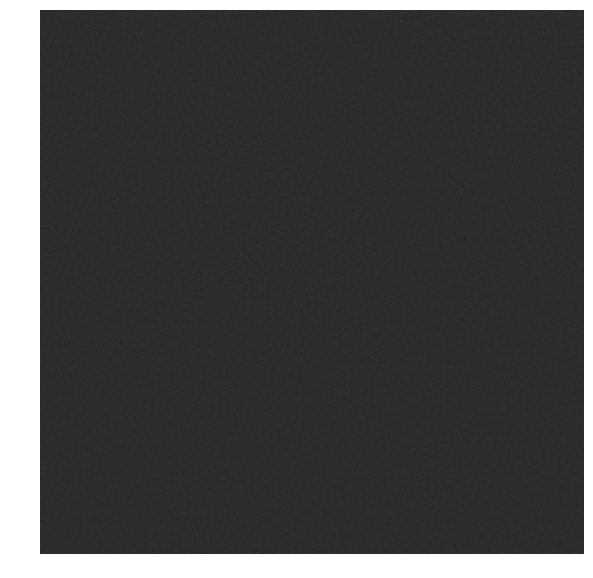

In [73]:
imm(exposure.adjust_log(lim_images2[0]))

In [99]:
type(lim_images2[0][0][0])

numpy.uint8

In [272]:
def clean_xray(img):
    image = sk.img_as_float(img.copy())
    if type(image) is not np.ndarray:
        raise TypeError('Input must be numpy ndarray.')
    else:
        p1 = np.percentile(image, 0.0001)
        p80, p99 = np.percentile(image, (80, 99.99))
        # print("mean:",image.mean(),'p80: ',p80,'p99: ',p99)
        image[image > p99] = p80
        image[image<p1] = p1
    return sk.img_as_ubyte(image)

/Users/cgroschner/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


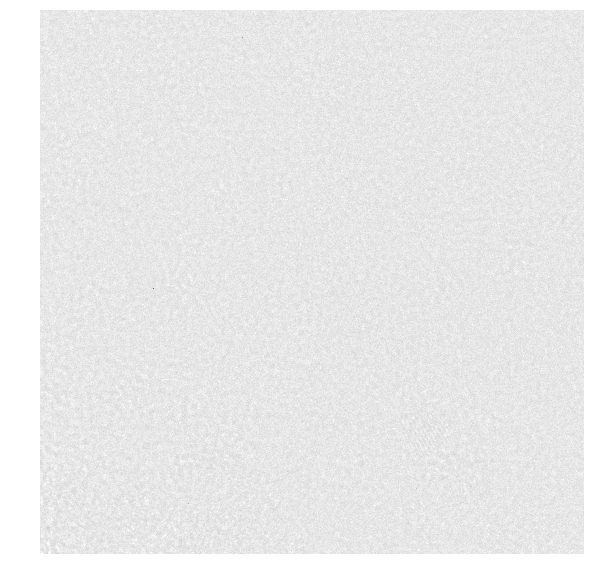

In [283]:
imm(clean_xray(images2[0]))

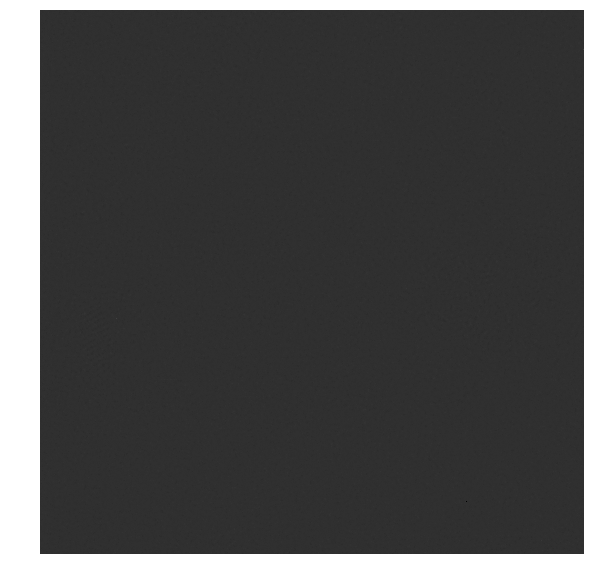

In [281]:
imm(images[2])

In [280]:
content

['/Users/cgroschner/Box Sync/Research/HR-TEM/20180329/101727H_from20180218/8bit',
 '/Users/cgroschner/Box Sync/Research/HR-TEM/20180209/101727H_prep20180208_plasma/8bit',
 '/Users/cgroschner/Box Sync/Research/HR-TEM/20180220/101727H_prep20180208_sampleA/8bit',
 '/Users/cgroschner/Box Sync/Research/HR-TEM/20180227/20180227_101729F_prepped20171204/8bit',
 '/Users/cgroschner/Box Sync/Research/HR-TEM/20180117/101727H_sampleprep20180116/8bit',
 '/Users/cgroschner/Box Sync/Research/HR-TEM/20171117_CdSe/8bit',
 '/Users/cgroschner/Box Sync/Research/HR-TEM/20171211_CdSe_101729F_TEAM05/101729F_sampleprep20171204/8bit']